## <span style="color:#000080"> **Análise Exploratória e Qualidade dos Dados**

### <span style="color:#4169E1"><b>1.1 Definição de pronto:</span> Dados analisados e insights documentados

### <span style="color:#4169E1"><b>1.2 Definição de entregue:</span> Notebook executando sem erros
### .....................................................................................................................

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.preprocessing as sklpp
import geopandas as gp

pd.set_option("display.precision", 4)

import warnings
warnings.filterwarnings("ignore")

<b>Numpy</b> é uma biblioteca que é usada principalmente para realizar cálculos em Arrays Multidimensionais. 
<br>O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos

<b>Pandas</b> é uma biblioteca de software utilizada para manipulação e análise de dados. 
<br>Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

<b>Matplotlib</b> é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, <br>
feita para e da linguagem de programação Python e sua extensão de matemática NumPy.

<b>Pyplot</b> é um módulo do Matplotlib que oferece uma interface semelhante ao MATLAB.
<br>Matplotlib é projetado e desenvolvido para ter a mesma usabilidade do MATLAB, mas com a flexibilidade da linguagem Python.

<b>Sklearn</b> (conhecida como scikit-learn) é uma biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados.
<br>Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

<b>GeoPandas</b> é uma biblioteca para adicionar suporte a dados geográficos para objetos pandas.
<br> Seu objetivo é facilitar o trabalho com dados geoespaciais em python, fornecendo operações geoespaciais em pandas e uma interface de alto nível para múltiplas geometrias para ter forma. (Pre-requisito nesta ordem: shapely pyproj rtree GDAL  fiona pygeos )

<b>Seaborn</b> é uma biblioteca que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada. 

### ***A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura***

In [20]:
# Carga do arquivo csv preparada para a análise exploratória de dados. Ajustes de separador, primeira coluna como índice e parse de Data.
source_file = '../../Data/process/teste_02_concilia_patio1.csv'

df_patio = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])

In [21]:
df_patio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Longitude          8760 non-null   float64       
 1   Latitude           8760 non-null   float64       
 2   Data               8760 non-null   datetime64[ns]
 3   Magnitude_Verif    8760 non-null   float64       
 4   pressao_Verif      8760 non-null   float64       
 5   Temperatura_Verif  8760 non-null   float64       
 6   Direcao_Verif      8760 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 547.5 KB


#### <span style="color:#4F4F4F">A1. Posição do Vento.

In [22]:
def define_RosaVentos(num):
    if num > 0 and num < 22.5:
        return 'N'
    elif num >= 22.4 and num < 45:
        return 'NE'
    elif num > 44 and num < 67.5:
        return 'NE'
    elif num > 67.4 and num < 90:
        return 'E'
    elif num > 89 and num < 112.5:
        return 'E'
    elif num > 112.4 and num < 135:
        return 'SE'
    elif num > 134 and num < 157.5:
        return 'SE'
    elif num > 157.4 and num < 180:
        return 'S'
    elif num > 179 and num < 202.5:
        return 'S'
    elif num > 202.4 and num < 225:
        return 'SW'
    elif num > 224 and num < 247.5:
        return 'SW'
    elif num > 247.4 and num < 270:
        return 'W'
    elif num > 269 and num < 292.5:
        return 'W'
    elif num > 292.4 and num < 315:
        return 'NW'
    elif num > 314 and num < 337.5:
        return 'NW'
    elif num > 337.4 and num < 361:
        return 'N'
    return 'X'


df_patio['PosicaoVento'] = df_patio['Direcao_Verif'].map(define_RosaVentos)

#### <span style="color:#4F4F4F">A.2. Exportar Dataframe com Posição do Vento

In [23]:
save_file = '../../Data/process/teste_02_PosicaoVento_Verif.csv'
df_patio.to_csv(save_file, index = True)

### <span style="color:#006400"> **B) Análise sobre os Dados**

#### <span style="color:#228B22">B1. Verificação de formato dos dados. 5 registros.

In [24]:
df_patio.head(5)

,Longitude,Latitude,Data,Magnitude_Verif,pressao_Verif,Temperatura_Verif,Direcao_Verif,PosicaoVento
0,-42.75,-14.25,2017-01-01 00:00:00,9.82,884.46,19.54,119.7170,SE
1,-42.75,-14.25,2017-01-01 01:00:00,8.74,882.33,18.52,119.2000,SE
2,-42.75,-14.25,2017-01-01 02:00:00,8.45,882.00,17.63,120.9835,SE
3,-42.75,-14.25,2017-01-01 03:00:00,9.18,882.00,16.92,119.7170,SE
4,-42.75,-14.25,2017-01-01 04:00:00,9.19,882.67,16.48,116.7170,SE


#### <span style="color:#228B22"> B2. Verificação de nulidade e tipos de dados. 

In [25]:
df_patio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Longitude          8760 non-null   float64       
 1   Latitude           8760 non-null   float64       
 2   Data               8760 non-null   datetime64[ns]
 3   Magnitude_Verif    8760 non-null   float64       
 4   pressao_Verif      8760 non-null   float64       
 5   Temperatura_Verif  8760 non-null   float64       
 6   Direcao_Verif      8760 non-null   float64       
 7   PosicaoVento       8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 615.9+ KB


#### <span style="color:#228B22">**B3. Estatísticas Gerais**

- A mínima e a máxima são os valores nos “extremos” de um conjunto de dados ordenados: ou seja, o menor e o maior valor. Ambos são utilizados cotidianamente e facilmente compreensíveis
- A média consiste na soma dos valores dividido pelo número de observações. 
- A mediana, o valor que está no meio deste conjunto de dados ordenados.
<br><br>
Enquanto a média leva em consideração todos os valores e é afetada pelos outliers, a mediana ordena os valores de forma crescente e busca por aquele que está no meio.

#### <span style="color:#006400">**B3.1 Variaveis Contínuas**

In [26]:
df_patio.describe(include=[np.number])

,Longitude,Latitude,Magnitude_Verif,pressao_Verif,Temperatura_Verif,Direcao_Verif
count,8760.00,8760.00,8760.0000,8760.0000,8760.0000,8760.0000
mean,-42.75,-14.25,7.9984,884.3193,19.3461,123.0675
std,0.00,0.00,2.7865,2.5059,3.7956,52.6673
min,-42.75,-14.25,0.7800,876.1700,9.4200,19.2165
25%,-42.75,-14.25,6.0800,882.6700,16.6800,102.9790
50%,-42.75,-14.25,8.1500,884.0000,19.2700,109.9250
75%,-42.75,-14.25,9.8800,886.0000,21.9500,118.2500
max,-42.75,-14.25,16.9400,892.8300,29.6000,353.2165


##### <span style="color:#006400">**B3.2 Variaveis Categóricas**

In [27]:
df_patio.describe(exclude=[np.number])

,Data,PosicaoVento
count,8760,8760
unique,8760,8
top,2017-02-22 04:00:00,E
freq,1,5076
first,2017-01-01 00:00:00,NaN
last,2017-12-31 23:00:00,NaN


#### <span style="color:#228B22">B4. Variação Dinâmica das Variáveis Contínuas

In [28]:
for (column, _ ) in df_patio.filter(items=['pressao_Verif','Temperatura_Verif','Magnitude_Verif']).items():
    print(f'{column} \t faixa dinâmica: {"{:.2f}".format(df_patio[column].max() - df_patio[column].min())}')

pressao_Verif 	 faixa dinâmica: 16.66
Temperatura_Verif 	 faixa dinâmica: 20.18
Magnitude_Verif 	 faixa dinâmica: 16.16


### <span style="color:#006400"> **C) Visualização Gráfica - Mapa**

#### <span style="color:#228B22">C1. Criando informação de ponto geométrico 

In [34]:
df_patio_coord = pd.read_csv('../../Data/raw/eolica/00_cadastro_patio.txt', delimiter=';', index_col=0)
df_patiog = gp.GeoDataFrame(df_patio_coord, geometry=gp.points_from_xy(df_patio_coord.Longitude, df_patio_coord.Latitude))

# df_patiog = gp.GeoDataFrame(df_patio, geometry=gp.points_from_xy(df_patio.Longitude, df_patio.Latitude))
# df_patiog.head(5)

#### <span style="color:#228B22">C2. Plotando o ponto no mapa >>> Achar shape dos estados do Brasil onde os pontos serão mostrados <<<

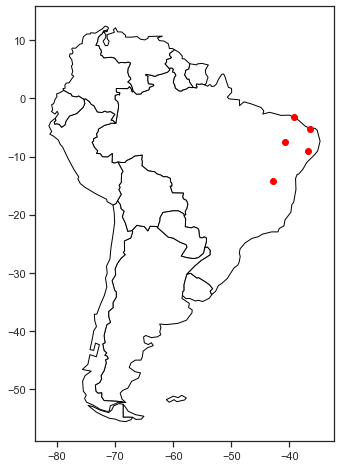

In [35]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# Restrito para América do Sul
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black',figsize=(10, 8))

# Plotando o gráfico.
df_patiog.plot(ax=ax, color='red')

plt.show()

### <span style="color:#006400"> **D) Visualização Gráfica - Histograma**

#### <span style="color:#228B22"> **D1. Histogramas com as distribuições das variáveis**

<b>Histograma</b> é um gráfico que mostra a distribuição de acontecimentos registrados em todo o espectro. Graficamente é um conjunto de retângulos 
que têm as bases sobre o eixo x e a área proporcional às frequências de classe. Fatores a serem analisados:
<p>
<b>1. Amplitude:</b><br>
- Quantas amostras representam determinado comportamento? <br>
- A distribuição é mais homogênea entre as classes, ou as amostras se concentram em determinada região? <br>
<b>2.Mediana:</b><br>
- Qual é o ponto central onde, estatisticamente, existe o maior registro de ocorrências?<br>
<b>3.Dispersão:</b><br>
- Qual é o grau de variedade de classes que existem no meu sistema?<br>
- Existem amostras distribuídas entre muitos grupos no meu gráfico?

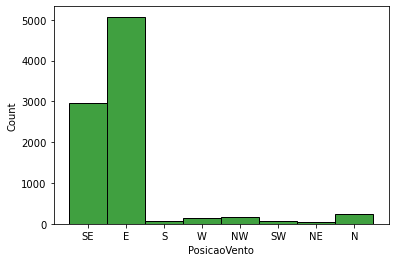

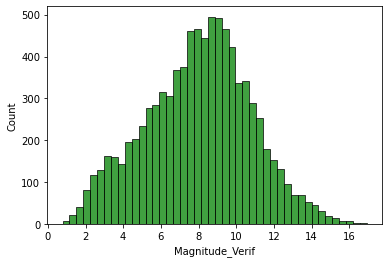

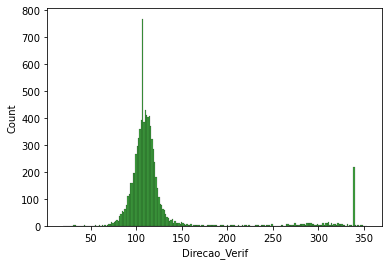

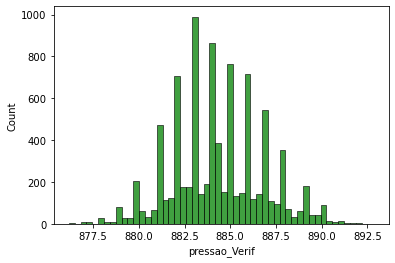

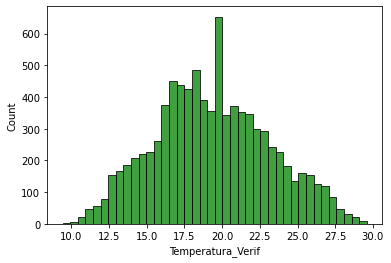

<Figure size 432x288 with 0 Axes>

In [29]:
for (column, _ ) in df_patio.filter(items=['PosicaoVento','Magnitude_Verif','Direcao_Verif','pressao_Verif','Temperatura_Verif']).items():
    sns.histplot(df_patio[column], color='green')
    plt.figure()

#### <span style="color:#228B22">**D2. Utilizando KDE - Kernel Density Estimate**

https://www.youtube.com/watch?v=DCgPRaIDYXA<br>
O gráfico KDE descrito como estimativa de densidade do kernel é usado para visualizar a densidade de probabilidade de uma variável contínua.
<p>
Um histograma é basicamente um gráfico de barras para variáveis quantitativas, que são divididas em intervalos, e nos mostra a frequência de dados que se tem em cada intervalo; o KDE é uma estimativa da densidade desses dados, calculando a probabilidade de se ter um ponto naquele local do gráfico.

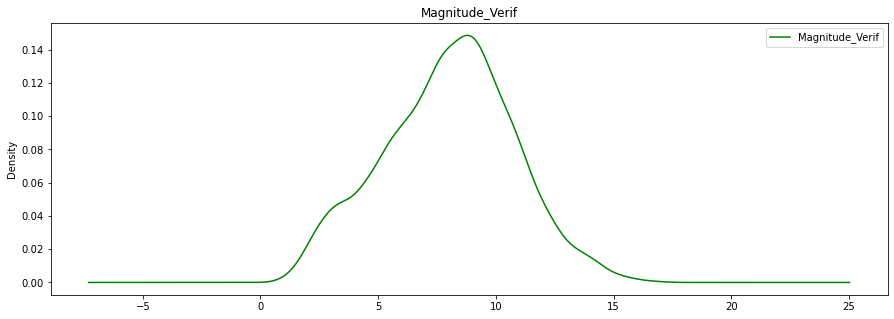

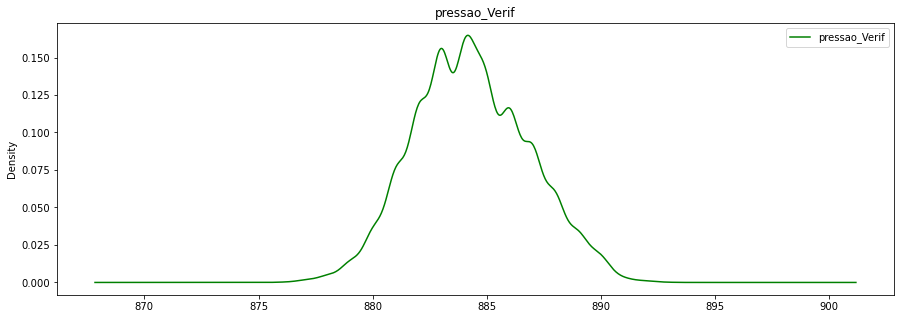

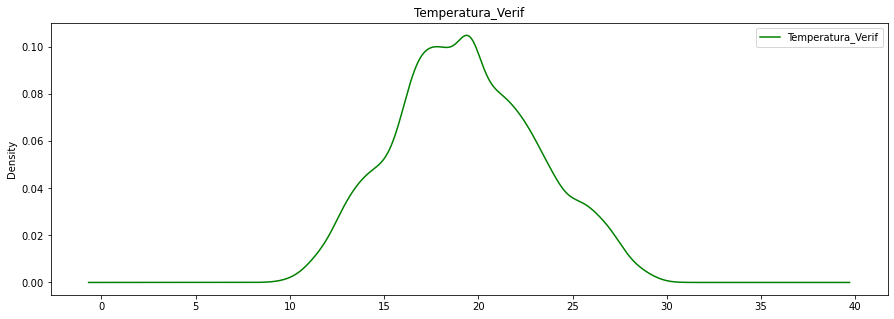

In [30]:
for (column, _ ) in df_patio.filter(items=['Magnitude_Verif','pressao_Verif','Temperatura_Verif']).items():
    plt.figure()
    df_patio[column].plot.kde(figsize=(15,5), legend=True,color='#008000');
    plt.legend(ncol = 1)
    plt.title(column)

### <span style="color:#006400"> **E) Coeficientes de correlação**

Para realizar a correlação de Pearson, é necessário cumprir o seguinte:<br>
- A escala de medição deve ser uma escala ou relação de intervalo;
- As variáveis devem ser aproximadamente distribuídas;
- A associação deve ser linear;
- Não deve haver valores atípicos nos dados.

<b>Correlação de Pearson</b> A correlação de Pearson avalia a relação linear entre duas variáveis contínuas. Uma relação é linear quando a mudança em uma variável é associada a uma mudança proporcional na outra variável. Os valores sempre serão entre +1 e -1, e que não é a mais indicada quando estamos tratando de dados categóricos.<br> 
( p = 1 Significa uma correlação perfeita positiva entre as duas variáveis. Uma relação linear positiva<br>
( p = -1 Significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui. Uma correlação negativa ou inversa<br>
( p = 0 Significa que as duas variáveis não dependem linearmente uma da outra.
<p><b>
Proximo de 1 ou -1 - É uma relação forte<br>
Proximo de 0 - É uma relação fraca

#### <span style="color:#228B22">**E.1. Visão Tabular**

In [31]:
df_patio_normalizado = df_patio.drop(['Longitude', 'Latitude','Data','PosicaoVento','Direcao_Verif'], axis=1)
df_patio_normalizado.corr()

,Magnitude_Verif,pressao_Verif,Temperatura_Verif
Magnitude_Verif,1.0000,0.4362,-0.5017
pressao_Verif,0.4362,1.0000,-0.4420
Temperatura_Verif,-0.5017,-0.4420,1.0000


#### <span style="color:#228B22">**E.2. Mapa de Calor**

O Mapa de Calor de Correlação foi projetado para explorar as relações entre até 10 parâmetros calculando o coeficiente de correlação de Pearson-R para cada par e é mais útil no início do processo exploratório. 

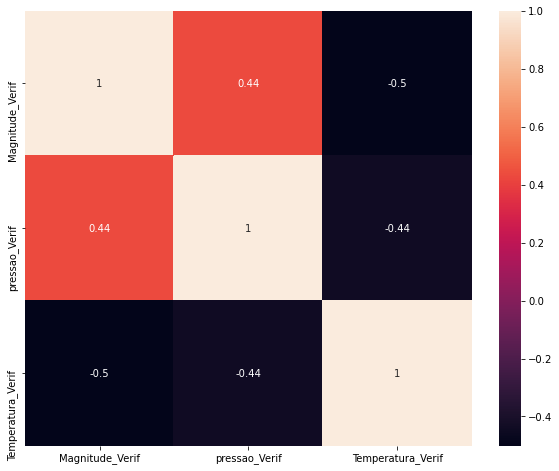

In [32]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_patio_normalizado.corr(),annot=True)

#### <span style="color:#228B22">**E.3. Outras Correlações**

<b>DataFrame.corr(method='?', min_periods=1)</b><br>
Função que mostra os coeficientes de correlação entre pares as variáveis,e mede o grau pelo qual duas variáveis tendem a mudar juntas. O coeficiente descreve a força e a direção da relação. Exemplo: Correlação entre2 colunas df['A'].corr(df['B'])<p>
 
<b><i>method{‘pearson’, ‘kendall’, ‘spearman’}</b></i> O pearson é o padrão.<p>

<b>Correlação de Spearman<br></b>
A correlação de Spearman avalia a relação monotônica entre duas variáveis contínuas ou ordinais. Em uma relação monotônica, as variáveis tendem a mudar juntas mas não necessariamente a uma taxa constante. O coeficiente de correlação de Spearman baseia-se nos valores classificados de cada variável, em vez de os dados brutos 
<p>
<b>Correlação de Kendall</b><br>
Assim como na correlação de Spearman, o τ de Kendall descreve a relação entre as variáveis através de uma função monotética. Isso quer dizer que ele analisa se o valor de uma variável aumenta ou diminui conforme o valor da outra variável aumenta ou diminui. Como resultado, os valores de τ vão de -1 a +1. Quanto mais próximo dos extremos (-1 ou 1), maior é a força da correlação, enquanto valores próximos de 0 implicam em correlações mais fracas ou inexistentes.


In [33]:
df_patio_normalizado.corr(method='kendall')

,Magnitude_Verif,pressao_Verif,Temperatura_Verif
Magnitude_Verif,1.0000,0.3129,-0.3367
pressao_Verif,0.3129,1.0000,-0.2960
Temperatura_Verif,-0.3367,-0.2960,1.0000


### <span style="color:#006400"> **F) Visualização Gráfica - Scatterplot**

<b>PairPlot</b> é um gráfico que mostra as relações entre todas as variáveis do conjunto de dados. <p>
      
Função pairplot - Combina 2 colunas do dataframe do tipo numérica e plota os graficos 
- Parametro hue ='colunaX do tipo string preferencialmente' => Muda as cores de acordo com a coluna
- parametro king='reg' = traça a tendencia da linha de regressão
- parametro king='kde' = traça a tendencia da densidade
- parametro height=5 = Aumenta o tamanho do grafico
    
    
    
<br>- A área sombreada sinalizada que a variabilidade que neste nivel de pontos é maior.
<br>- A propriedade "hue" segrega(agrupa) o conjunto de dados sobre os "valores" existentes nesta nova coluna
<br>- A propriedade "palette" relaciona a cores ..exemplo coolwarm
<br>- A propriedade "markers" relaciona figuras para diferenciar os grupos de valores de hue (https://matplotlib.org/stable/api/markers_api.html)
<br>, hue="Valor_Pressao", markers =['o','v'] , palette='coolwarm',#,markers =['+','2','*','p','3','1','v'])

<br><b>Analise Univariada</b>
<br><i>sns.distplot(df_patio_grafico.Magnitude_Verif, rug = True, fit = stats.gausshyper);</i>
<br>Mapa de Calor <i>sns.jointplot(data=df_patio, y = "Magnitude_Verif", x = "Magnitude_Observada", kind='hex') # ou kind=hex ou 'reg'</i>

#### <span style="color:#228B22">F.1. Com kde e regressão linear nas correlações

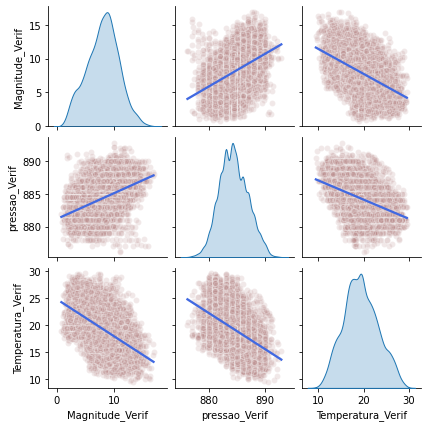

In [34]:
sns.pairplot(df_patio.filter(items=['Magnitude_Verif','pressao_Verif','Temperatura_Verif']), 
             diag_kind="kde", kind="reg", height=2.0
            ,plot_kws={'line_kws':{'color':'#4169E1'}, 
                           'scatter_kws': {'alpha': 0.2, 'color': '#BC8F8F','edgecolor': 'w'}})

### <span style="color:#006400"> **G) Visualização Gráfica - Box Plot (Diagrama de Caixa)**

Na estatística, o Boxplot, ou diagrama de caixa, é uma maneira gráfica de representar a alteração dos dados de uma variável por meio de quartis. É um método alternativo ao histograma e ao "ramo-e-folha" para representar os dados.
<p>
O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes). Embora o Boxplot forneça informação sobre localização e dispersão, seu verdadeiro valor está na informação que fornece sobre a cauda da distribuição.
<p>
Em um boxplot são apresentadas 5 estatísticas: o mínimo, o primeiro quartil (Q1), a mediana, o terceiro quartil (Q3) e o máximo. Esses valores também são chamados de resumo dos cinco números. Para construir um desenha-se um retângulo alinhado verticalmente (ou horizontalmente) com duas semirretas, uma em cada um dos lados opostos do retângulo.

A altura do retângulo é definida pelos quartis Q1 e Q3. Uma linha secciona o retângulo no valor da mediana (ou Q2). As semirretas ligam respectivamente os quartis Q1 e Q3 ao valor mínimo e ao máximo do conjunto de dados.

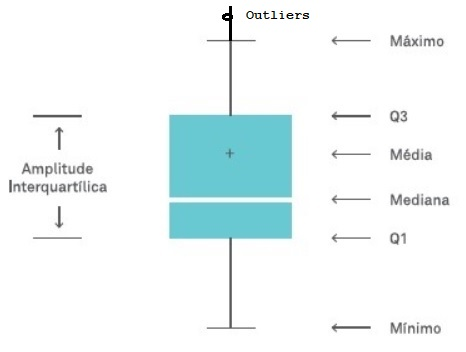

In [42]:
from IPython.display import Image
Image(filename='boxplot.jpg')

- O centro da distribuição é indicado pela linha da mediana, no centro do quadrado.
- A dispersão é representada pela amplitude do gráfico, que pode ser calculada como máximo valor – mínimo valor. Quanto maior for a amplitude, maior a variação nos dados.
- O retângulo contém 50% dos valores do conjunto de dados. A posição da linha mediana no retângulo informa sobre a assimetria da distribuição.
- Uma distribuição simétrica teria a mediana no centro do retângulo. Se a mediana é próxima de Q1, então, os dados são positivamente assimétricos.Se a mediana é próxima de Q3 os dados são negativamente assimétricos. 
- Os outliers em um box plot aparecem como pontos ou asteriscos fora das “linhas” desenhadas e indicam possíveis valores discrepantes.
- Caudas – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição. Os outliers serão os valores fora de Limite Inferior = Q1-1.5*(Q3-Q1) e Limite Superior = Q3+1.5*(Q3 -Q1).


In [35]:
df_patio.describe(include=[np.number])

,Longitude,Latitude,Magnitude_Verif,pressao_Verif,Temperatura_Verif,Direcao_Verif
count,8760.00,8760.00,8760.0000,8760.0000,8760.0000,8760.0000
mean,-42.75,-14.25,7.9984,884.3193,19.3461,123.0675
std,0.00,0.00,2.7865,2.5059,3.7956,52.6673
min,-42.75,-14.25,0.7800,876.1700,9.4200,19.2165
25%,-42.75,-14.25,6.0800,882.6700,16.6800,102.9790
50%,-42.75,-14.25,8.1500,884.0000,19.2700,109.9250
75%,-42.75,-14.25,9.8800,886.0000,21.9500,118.2500
max,-42.75,-14.25,16.9400,892.8300,29.6000,353.2165


<Figure size 432x288 with 0 Axes>

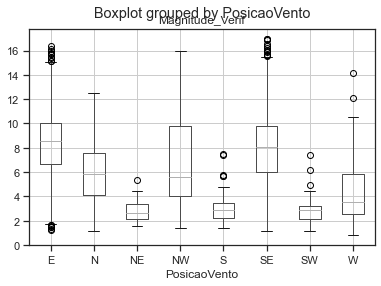

<Figure size 432x288 with 0 Axes>

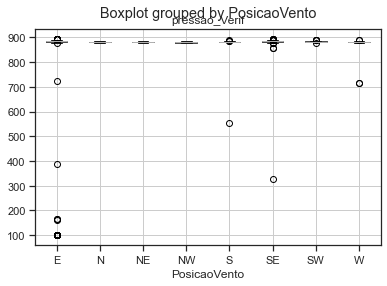

<Figure size 432x288 with 0 Axes>

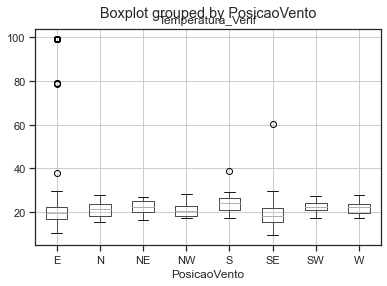

In [44]:
# Avaliar o grau de espalhamento de dados (dispersão) em torno da medida de centralidade
for (column, _ ) in df_patio.filter(items=['Magnitude_Verif','pressao_Verif','Temperatura_Verif']).items():
    plt.figure()
    df_patio.boxplot(column = column ,by='PosicaoVento');
    #plt.title(column)

### <span style="color:#D2691E"> **H) Normalização dos dados por Mínimo e Máximo**

<b>Normalizar</b> é uma técnica que visa transformar todas as variáveis na mesma ordem de grandeza e tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.<p>
   <i>Formula: Xnorm = (X - Xmin) / (Xmax - Xmin)</i><p>
       
Observação:Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.

#### <span style="color:#A0522D">H1. Usando MinMaxScaler para normalizar cada coluna

In [36]:
min_max_scaler = sklpp.MinMaxScaler()

df_patio_filtrado = df_patio.filter(items=['Magnitude_Verif','pressao_Verif','Temperatura_Verif'])

df_patio_normalizado = min_max_scaler.fit_transform(df_patio_filtrado)
df_patio_normalizado = pd.DataFrame(df_patio_normalizado)

# scikit learn retira as colunas do dataframe modificado. Colocando-as de volta
df_patio_normalizado.columns = df_patio_filtrado.columns

# visualização da normalização
df_patio_normalizado.head()

,Magnitude_Verif,pressao_Verif,Temperatura_Verif
0,0.5594,0.4976,0.5015
1,0.4926,0.3697,0.4509
2,0.4746,0.3499,0.4068
3,0.5198,0.3499,0.3717
4,0.5204,0.3902,0.3499


#### <span style="color:#A0522D">**H2.Grafico Paiplot com Valores Normalizados**

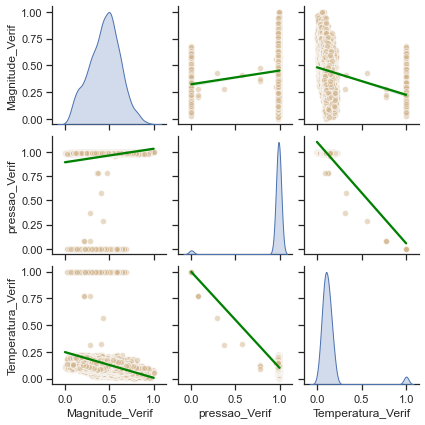

In [46]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_patio_normalizado, diag_kind="kde", kind="reg", height=2.0, plot_kws={'line_kws':{'color':'#008000'}, 
                           'scatter_kws': { 'color': '#D2B48C','edgecolor': 'w','alpha': 0.5}}) 

#### <span style="color:#A0522D">**H2.Grafico BoxPlot com Valores Normalizados**

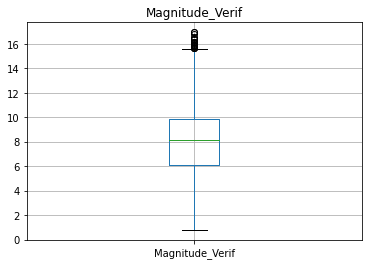

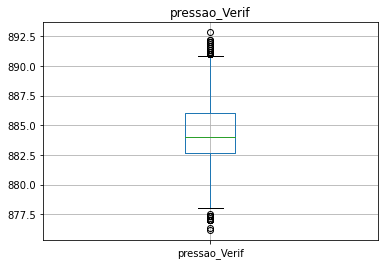

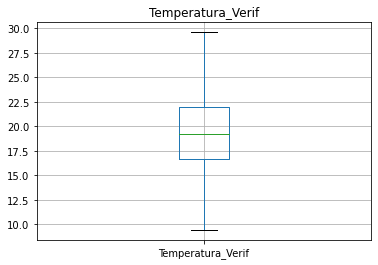

In [37]:
for (column, _ ) in df_patio_normalizado.items():
    plt.figure()
    df_patio.boxplot(column = column);
    plt.title(column)